<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
#!pip install pandas==0.23.4
#print(pd.__version__)

In [0]:
import pandas as pd
import seaborn as sb

# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


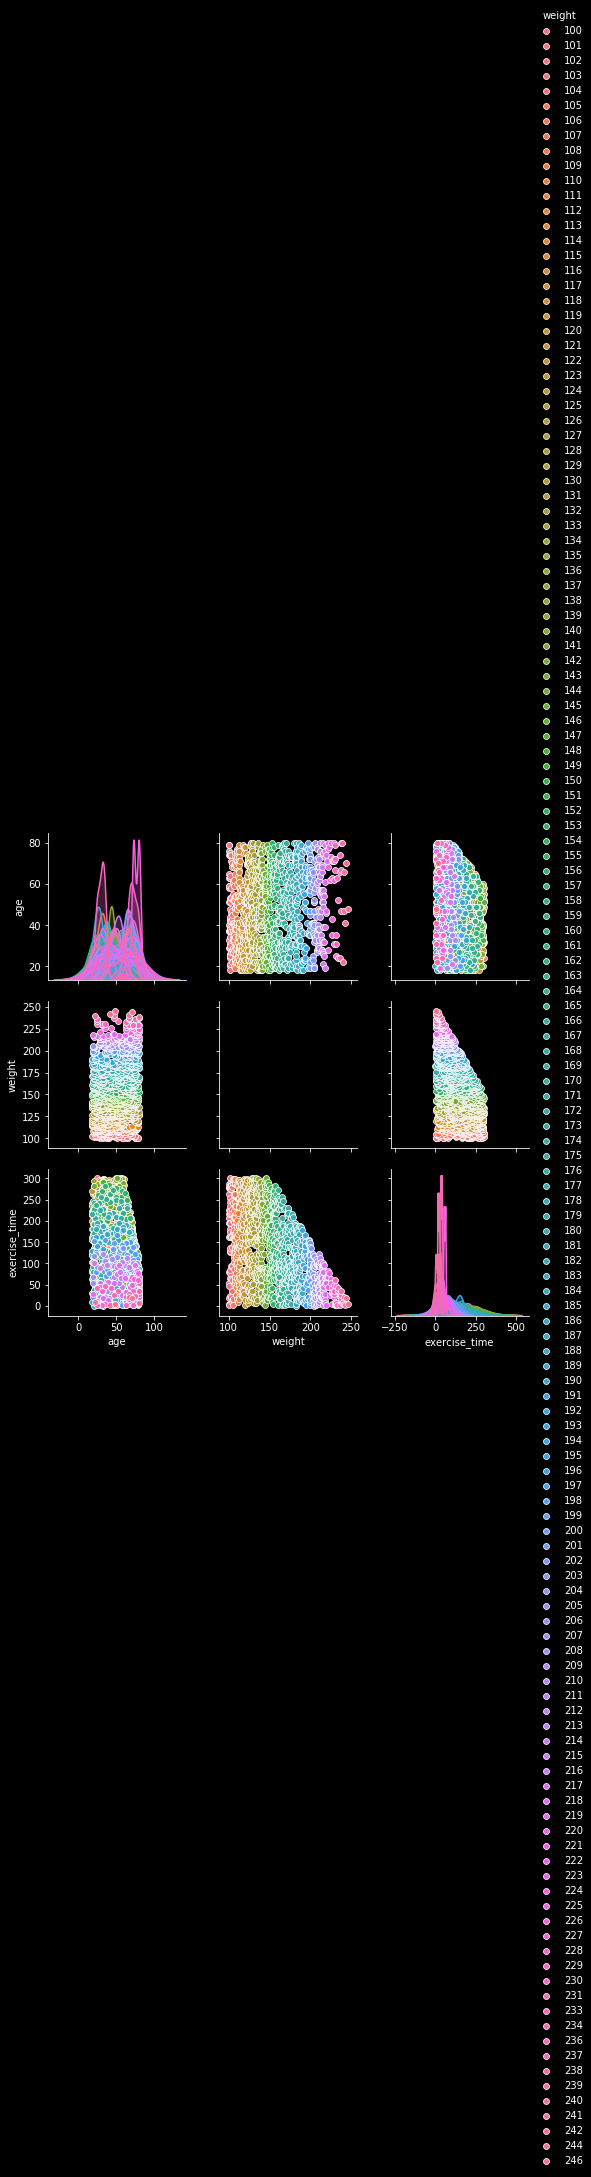

In [20]:
persons = pd.read_csv("https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv")
persons.set_index(persons.columns[0],inplace=True)
persons.head()
sb.pairplot(persons,hue="weight");

## The plot of exercise time as a function of age (with weight as the hue) provides the most insight. Anywhere where weight is both a hue and column (the "cross" in the middle) we lose information. The main diagonal is repetitive as well, so we really can only glean information from the upper-right and lower-left (which are inverses of each other and hence provde the same information)

## Let's explore this more directly

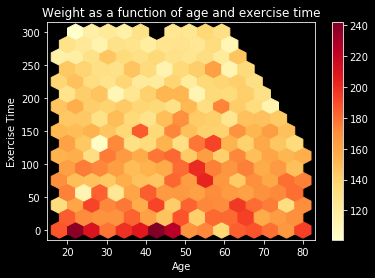

In [21]:
# A Student posted a plot similar to this and I liked it, so I figured out how to create it.
#It's more or less like the seaborn plot above (lower left) but larger, more professional, and one plot specifically

import numpy as np
import matplotlib.pyplot as plt


fig,ax = plt.subplots()
x = persons.age
y = persons.exercise_time
w = persons.weight

hb = ax.hexbin(x,y,w,gridsize=15,cmap='YlOrRd')
ax.set_title("Weight as a function of age and exercise time")
ax.set_xlabel('Age')
ax.set_ylabel('Exercise Time')

cb = fig.colorbar(hb)

### From the above plot, it appears that despite the age, there really is no correlation between age and weight. Higher weights tend to be concentrated near the lower end of exercise time with light weights near the top. For each age bin (shown below) We can see the lower age group is on the lighter side, where as the larger wieghts are more spread out. But any conclusions as to correlation between age and weight can't be drawn, rather it's exercise which exhibits the strongest correlation (we can imagine older people are unable to exercise as much as younger people and therefore are heavier, but again it's exercise, not age which correlates most strongly with weight)

In [0]:
weight_bins = pd.cut(persons.weight,5)
exercise_bins = pd.cut(persons.exercise_time,5)
age_bins = pd.cut(persons.age,5)

#pd.crosstab(weight_bins,age_bins)

### This becomes even more clear when we plot (below) Despire the age-bracket, there is no clear correlation between age and weight

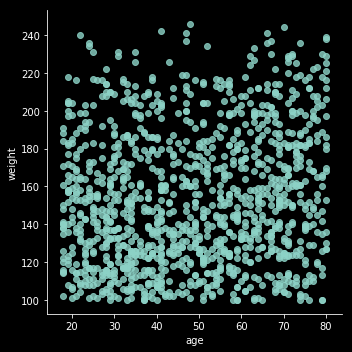

In [23]:
sb.lmplot('age','weight',persons,fit_reg=False);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


# 1
### All variables are continuous
# 2
### The only consistantly clear relationship is between excercise times and weight (they are inverses)

# 3
### From the plot, it appears that despite the age, there really is no correlation between age and weight. Higher weights tend to be concentrated near the lower end of exercise time with light weights near the top. From the crosstab for each age bin (shown below the plot) We can see the lower age group is on the lighter side, where as the larger wieghts are more spread out. But any conclusions as to correlation between age and weight can't be drawn, rather it's exercise which exhibits the strongest correlation (we can imagine older people are unable to exercise as much as younger people and therefore are heavier, but again it's exercise, not age which correlates most strongly with weight)

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

# 5 Sep 2019  -  Modifications after meeting with team lead <br>
# Better way of demonstrating age as confounding variable
(https://colab.research.google.com/github/macr/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb#scrollTo=AivDDK26hub-)

In [0]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

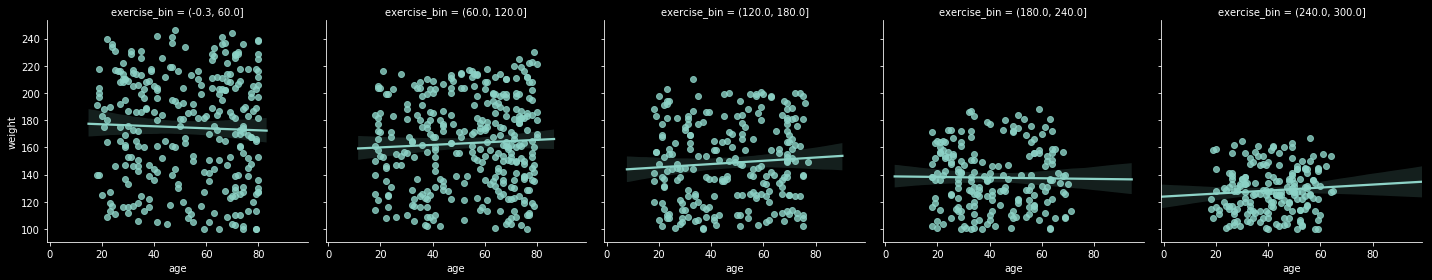

In [30]:
persons['age_bin']= age_bins
persons['exercise_bin'] = exercise_bins
persons['weight_bin'] = weight_bins

g = sb.FacetGrid(persons,col="exercise_bin",height=4)
g.map(sb.regplot,'age','weight');

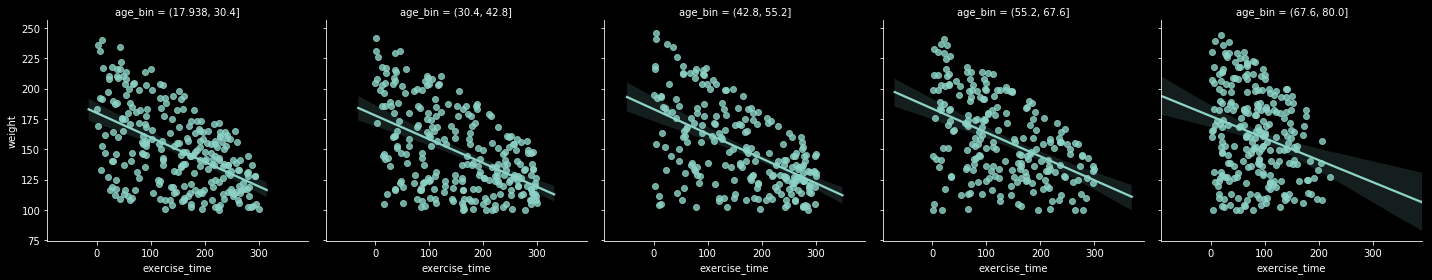

In [25]:
g = sb.FacetGrid(persons,col='age_bin',height=4)
g.map(sb.regplot,'exercise_time','weight');